this code is for nucleus segmentation & # of cell

In [1]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [2]:
# Load the image
figName = '../Drug7_1000nM/rep1_FOV1.tif'
img = imread(str(figName))
type(img)
#use the first frame of the red channel
gray=img[0,:,:,0]

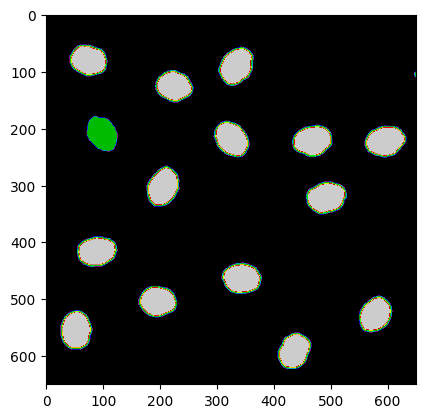

In [3]:
from skimage import filters
import numpy as np

# use multiotsu to calculate two thresholds
thresholds = filters.threshold_multiotsu(gray, classes=3)

# use the threshold to segment the image into 3 regions
regions = np.digitize(gray, bins=thresholds)

# Display the image and plot all the regions
plt.imshow(regions, cmap='nipy_spectral')
plt.show()

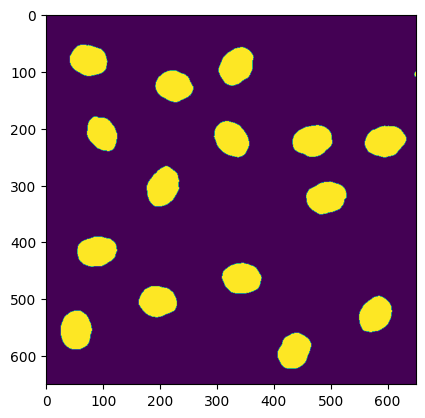

In [4]:
plt.imshow(regions>0)
plt.show()

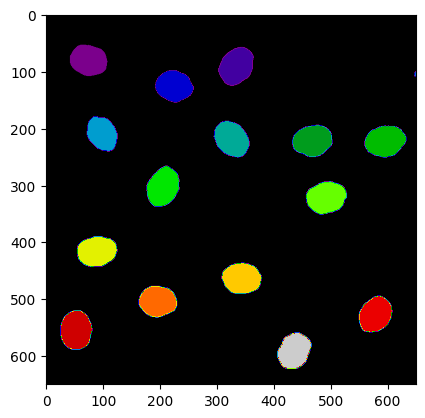

In [5]:
from skimage import measure
# use the threshold to segment the image in binary
binary = regions > 0

# label connected regions
labels = measure.label(binary)

# show the result
plt.imshow(labels, cmap='nipy_spectral')
plt.show()

In [6]:
cell_number=labels.max()
n_size=np.zeros(cell_number)
for i in range(1,labels.max()+1):
    n_size[i-1]=sum(sum(labels==i))

# delete the label of non-cell regions
# calculate the threshold of area(10% of the largest cell area)
threshold = n_size.max() / 10

# find the labels of the regions with area larger than the threshold
valid_labels = np.where(n_size > threshold)[0] + 1

from scipy import ndimage

# filter out labels with area smaller than the threshold
filtered_labels = np.isin(labels, valid_labels) * labels

# relabel connected regions
relabelled, n_features = ndimage.label(filtered_labels > 0)

# print the number of cells
cell_number=relabelled.max()
print('cell number is '+str(cell_number))

# calculate and print the area of each label
new_n_size = np.zeros(n_features)

for i in range(1, n_features+1):
    new_n_size[i-1] = np.sum(relabelled == i)
    print('size of cell nucleus ' + str(i) + ' is ' + str(new_n_size[i-1]) + ' pixels')

cell number is 15
size of cell nucleus 1 is 2836.0 pixels
size of cell nucleus 2 is 3055.0 pixels
size of cell nucleus 3 is 2753.0 pixels
size of cell nucleus 4 is 2458.0 pixels
size of cell nucleus 5 is 2908.0 pixels
size of cell nucleus 6 is 3010.0 pixels
size of cell nucleus 7 is 3052.0 pixels
size of cell nucleus 8 is 2997.0 pixels
size of cell nucleus 9 is 3095.0 pixels
size of cell nucleus 10 is 2930.0 pixels
size of cell nucleus 11 is 2940.0 pixels
size of cell nucleus 12 is 2841.0 pixels
size of cell nucleus 13 is 2782.0 pixels
size of cell nucleus 14 is 2984.0 pixels
size of cell nucleus 15 is 2796.0 pixels


main output: relabelled (To identify every nucleus)